# Set up

In [67]:
from google.cloud import bigquery
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
from sklearn.cluster import KMeans

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../secrets/service_account.json'
client = bigquery.Client()

In [75]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [10]:
%matplotlib inline

# Getting data

In [50]:
sql = \
'''
SELECT
  eg.element,
  e.safe_web_name,
  e.element_type,
  AVG(total_points) AS avg_total_points,
  STDDEV_SAMP(total_points) AS std_total_points,
  MAX(total_points) AS max_total_points,
  AVG(value) AS avg_value,
  AVG(total_points)/AVG(value) AS avg_points_value,
  AVG(bps) AS avg_bps,
  AVG(bonus) AS avg_bonus,
  AVG(goals_scored) AS avg_goals_scored,
  AVG(minutes) AS avg_minutes,
  AVG(clean_sheets) AS avg_clean_sheets,
  AVG(completed_passes) AS avg_completed_passes,
  AVG(recoveries) AS avg_recoveries,
  AVG(assists) AS avg_assists,
  AVG(key_passes) AS avg_key_passes,
  AVG(winning_goals) AS avg_winning_goals,
  AVG(tackled) AS avg_tackled,
  AVG(dribbles) AS avg_dribbles,
  AVG(clearances_blocks_interceptions) AS avg_clearances_blocks_interceptions,
  AVG(big_chances_created) AS avg_big_chances_created,
  AVG(target_missed) AS avg_target_missed,
  AVG(fouls) AS avg_fouls,
  AVG(tackles) AS avg_tackles,
  AVG(open_play_crosses) AS avg_open_play_crosses,
  AVG(offside) AS avg_offside,
  AVG(big_chances_missed) AS avg_big_chances_missed,
  AVG(saves) AS avg_saves,
  AVG(goals_conceded) AS avg_goals_conceded,
  AVG(attempted_passes) AS avg_attempted_passes,
  AVG(errors_leading_to_goal) AS avg_errors_leading_to_goal,
  AVG(errors_leading_to_goal_attempt) AS avg_errors_leading_to_goal_attempt,
  AVG(own_goals) AS avg_own_goals,
  AVG(penalties_conceded) AS avg_penalties_conceded,
  AVG(penalties_missed) AS avg_penalties_missed,
  AVG(penalties_saved) AS avg_penalties_saved,
  AVG(red_cards) AS avg_red_cards,
  AVG(yellow_cards) AS avg_yellow_cards,
  AVG(big_chances_missed + goals_scored) AS avg_big_chances,
  AVG(saves + goals_conceded) AS avg_shots_conceded
FROM
  `fpl.element_gameweeks_1819` AS eg
INNER JOIN
  `fpl.elements_1819` AS e
ON
  eg.element = e.element
GROUP BY
  1,
  2,
  3
ORDER BY
  1
'''

df = client.query(sql).to_dataframe()

In [51]:
df.head()

element safe_web_name  element_type  avg_total_points  std_total_points  \
0        1          cech             1          0.631579          1.937134   
1        2          leno             1          2.789474          2.182955   
2        3     koscielny             2          1.631579          3.291439   
3        4      bellerin             2          1.578947          2.747299   
4        5       monreal             2          2.026316          2.736014   

   max_total_points  avg_value  avg_points_value    avg_bps  avg_bonus  \
0                11  48.631579          0.012987   3.421053   0.078947   
1                 9  48.315789          0.057734  14.947368   0.131579   
2                15  54.131579          0.030141   8.394737   0.210526   
3                11  54.000000          0.029240   8.000000   0.131579   
4                10  54.342105          0.037288  10.315789   0.184211   

   avg_goals_scored  avg_minutes  avg_clean_sheets  avg_completed_passes  \
0          0.000000    15.394737          0.026316              4.026316   
1          0.000000    74.605263          0.157895             16.789474   
2          0.078947    34.973684          0.078947             21.552632   
3          0.000000    40.315789          0.105263             17.342105   
4          0.026316    48.947368          0.131579             26.894737   

   avg_recoveries  avg_assists  avg_key_passes  avg_winning_goals  \
0        1.631579     0.000000        0.000000                0.0   
1        7.815789     0.000000        0.000000                0.0   
2        2.078947     0.000000        0.052632                0.0   
3        2.078947     0.131579        0.210526                0.0   
4        2.605263     0.105263        0.289474                0.0   

   avg_tackled  avg_dribbles  avg_clearances_blocks_interceptions  \
0     0.000000      0.000000                             0.210526   
1     0.026316      0.000000                             0.894737   
2     0.078947      0.026316                             2.947368   
3     0.631579      0.368421                             1.447368   
4     0.263158      0.184211                             2.368421   

   avg_big_chances_created  avg_target_missed  avg_fouls  avg_tackles  \
0                 0.000000           0.000000   0.000000     0.026316   
1                 0.000000           0.000000   0.000000     0.000000   
2                 0.000000           0.026316   0.236842     0.289474   
3                 0.105263           0.157895   0.421053     0.315789   
4                 0.105263           0.052632   0.447368     0.210526   

   avg_open_play_crosses  avg_offside  avg_big_chances_missed  avg_saves  \
0               0.000000     0.000000                0.000000   0.710526   
1               0.000000     0.000000                0.000000   2.763158   
2               0.000000     0.000000                0.026316   0.000000   
3               0.236842     0.026316                0.000000   0.000000   
4               0.105263     0.026316                0.026316   0.000000   

   avg_goals_conceded  avg_attempted_passes  avg_errors_leading_to_goal  \
0            0.236842              5.868421                    0.000000   
1            1.105263             24.263158                    0.105263   
2            0.605263             23.421053                    0.000000   
3            0.552632             20.605263                    0.000000   
4            0.631579             30.763158                    0.026316   

   avg_errors_leading_to_goal_attempt  avg_own_goals  avg_penalties_conceded  \
0                            0.052632       0.000000                     0.0   
1                            0.026316       0.000000                     0.0   
2                            0.000000       0.000000                     0.0   
3                            0.078947       0.026316                     0.0   
4                            0.000000       0.000000   

In [52]:
df = df[
    (df['avg_minutes'] > 45)
    & (df['element_type'].isin([2, 3, 4]))
]

# Analysing data

In [53]:
pandas_profiling.ProfileReport(df)

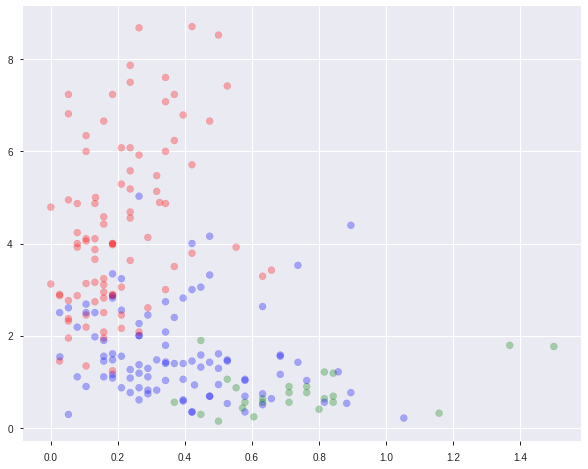

In [96]:
col_dict = {
    1: 'y',
    2: 'r',
    3: 'b',
    4: 'g'
}

plt.figure(figsize=(10, 8))
plt.scatter(
    df['avg_target_missed'],
    df['avg_clearances_blocks_interceptions'],
    alpha=.3,
    c=df['element_type'].apply(lambda x: col_dict[x])
)
plt.show()

In [105]:
df.groupby('element_type').mean()

element  avg_total_points  std_total_points  \
element_type                                                   
2             259.613636          2.377544          2.816317   
3             278.216495          2.737721          2.681068   
4             278.520000          3.713363          3.646539   

              max_total_points  avg_value  avg_points_value    avg_bps  \
element_type                                                             
2                    10.454545  48.884019          0.047825  12.927471   
3                    11.298969  58.390656          0.046196  11.164163   
4                    13.720000  75.357373          0.051062  12.221434   

              avg_bonus  avg_goals_scored  avg_minutes  avg_clean_sheets  \
element_type                                                               
2              0.192980          0.032624    66.899392          0.201823   
3              0.203482          0.117067    63.107915          0.215481   
4              0.468782          0.320401    66.311569          0.220551   

              avg_completed_passes  avg_recoveries  avg_assists  \
element_type                                                      
2                        27.996558        3.989491     0.052664   
3                        26.362225        4.208680     0.114101   
4                        13.237995        2.189704     0.148571   

              avg_key_passes  avg_winning_goals  avg_tackled  avg_dribbles  \
element_type                                                                 
2                   0.393944           0.008987     0.532693      0.316460   
3                   0.937273           0.031495     1.577055      0.804901   
4                   0.805414           0.091840     2.189424      0.773774   

              avg_clearances_blocks_interceptions  avg_big_chances_created  \
element_type                                                                 
2                                        4.405638                 0.063856   
3                                        1.610417                 0.134890   
4                                        0.784120                 0.150596   

              avg_target_missed  avg_fouls  avg_tackles  \
element_type                                              
2                      0.210942   0.601170     0.495946   
3                      0.383462   0.756974     0.478888   
4                      0.740120   0.925173     0.225063   

              avg_open_play_crosses  avg_offside  avg_big_chances_missed  \
element_type                                                               
2                          0.189641     0.046679                0.027512   
3                          0.235402     0.131522                0.078570   
4                          0.092632     0.573694                0.272882   

              avg_saves  avg_goals_conceded  avg_attempted_passes  \
element_type                                                        
2                   0.0            1.054342             34.406181   
3                   0.0            0.950162             32.113180   
4                   0.0            1.039248             18.431649   

              avg_errors_leading_to_goal  avg_errors_leading_to_goal_attempt  \
element_type                                                                   
2                               0.013182                            0.028577   
3                               0.004891                            0.017317   
4                               0.000000                            0.006015   

              avg_own_goals  avg_penalties_conceded  avg_penalties_missed  \
element_type                                                                
2                  0.006280                0.014354              0.000000   
3                  0.000814                0.003534              0.002984   
4                  0.001053                0.004211              0.004211   

              av

In [117]:
cols = [
    'avg_goals_scored',
    'avg_big_chances',
    'avg_target_missed',
    'avg_offside',
    #'avg_tackled',
    #'avg_dribbles',
    'avg_assists',
    'avg_big_chances_created',
    'avg_key_passes',
    #'avg_completed_passes',
    'avg_open_play_crosses',
    'avg_clearances_blocks_interceptions',
    'avg_tackles',
    'avg_errors_leading_to_goal_attempt'
]

X = df[cols].to_numpy()

In [121]:
kmeans = KMeans(
    n_clusters=3,
    n_init=100
).fit(X)
df['cluster'] = kmeans.labels_

In [122]:
df[['safe_web_name', 'element_type', 'cluster']].sort_values(['cluster', 'element_type', 'safe_web_name'])

safe_web_name  element_type  cluster
30                ake             2        0
352      alderweireld             2        0
463          balbuena             2        0
90              bamba             2        0
334          bednarek             2        0
426           bennett             2        0
422              boly             2        0
375          cathcart             2        0
8            chambers             2        0
429             coady             2        0
115        david luiz             2        0
408              diop             2        0
48              duffy             2        0
47               dunk             2        0
91       ecuele manga             2        0
221             evans             2        0
161             keane             2        0
197           kongolo             2        0
311         lascelles             2        0
454       le marchand             2        0
219           maguire             2        0
69                mee             2        0
579            mepham             2        0
89           morrison             2        0
6             mustafi             2        0
180              odoi             2        0
142             sakho             2        0
481             schar             2        0
191         schindler             2        0
26         steve cook             2        0
71          tarkowski             2        0
137           tomkins             2        0
245          van dijk             2        0
462       vestergaard             2        0
144       wan-bissaka             2        0
525             zouma             2        0
388            capoue             3        0
196       hadergjonaj             2        1
7           kolasinac             2        1
192              lowe             2        1
353              rose             2        1
364              alli             3        1
586           almiron             3        1
507       andre gomes             3        1
414           antonio             3        1
32              arter             3        1
574             babel             3        1
570            barnes             3        1
506           bernard             3        1
275    bernardo silva             3        1
465          bissouma             3        1
41             brooks             3        1
181           cairney             3        1
503          camarasa             3        1
270       david silva             3        1
393          deulofeu             3        1
363           eriksen             3        1
254           fabinho             3        1
464   felipe anderson             3        1
39             fraser             3        1
224              gray             3        1
58              gross             3        1
75        gudmundsson             3        1
450         guendouzi             3        1
273          gundogan             3        1
322            hayden             3        1
121            hazard             3        1
248         henderson             3        1
77           hendrick             3        1
98            hoilett             3        1
391            hughes             3        1
14              iwobi             3        1
431              jota             3        1
125             kante             3        1
54          knockaert             3        1
411           kouyate             3        1
498           kovacic             3        1
369       lucas moura             3        1
232          maddison             3        1
250              mane             3        1
57              march             3        1
533            mcneil             3        1
526             mendy             3        1
253            milner             3        1
198              mooy             3        1
474          moutinho             3        1
105            murphy             3        1
410             noble             3        1
12 

In [123]:
pd.DataFrame(kmeans.cluster_centers_, columns=cols)

avg_goals_scored  avg_big_chances  avg_target_missed  avg_offside  \
0          0.039868         0.074007           0.256324     0.038445   
1          0.178865         0.315720           0.482870     0.270281   
2          0.041266         0.069004           0.229374     0.040910   

   avg_assists  avg_big_chances_created  avg_key_passes  \
0     0.030290                 0.036652        0.212112   
1     0.136023                 0.154246        0.974995   
2     0.065263                 0.078947        0.558720   

   avg_open_play_crosses  avg_clearances_blocks_interceptions  avg_tackles  \
0               0.032717                             6.243166     0.523702   
1               0.235431                             1.034798     0.356723   
2               0.234054                             3.109018     0.554452   

   avg_errors_leading_to_goal_attempt  
0                            0.039517  
1                            0.012107  
2                            0.022760